# <center>House Prices Prediction</center>
<h3 style="float:right">Gînga Raluca-Andreea</h3>

## Table of Contents:
* [Introduction](#step0)
* [Importing the libraries & Loading the dataset](#step1)
* [Data Exploration](#step2)
* [Data Cleaning](#step3)
* [Data Visualization](#step4)
* [Building the Model](#step5)


## Introduction <a id="step0"></a>

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png" width=700/>

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges people to predict the final price of each home.

## Importing the libraries & Loading the dataset <a id="step1"></a>

In [572]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [678]:
# Linear algebra
import numpy as np

# Data processing
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Algorithms
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import scipy.stats as spst
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier , AdaBoostClassifier , ExtraTreesClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score , StratifiedKFold , GridSearchCV , learning_curve


In [679]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Data Exploration <a id="step2"></a>

We will see how our data look like, use the describe function for the key statistics, use the shape function (how many rows and columns are in our dataset).


In [680]:
train.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [681]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [682]:
print('Shape of Training set: {}'.format(train.shape))
print('Shape of Test set: {}'.format(test.shape))

Shape of Training set: (1460, 81)
Shape of Test set: (1459, 80)


#### Checking the type of each feature


In [683]:
print('Type of train columns: \n\n')
print(train.dtypes)
print()
print('Type of test columns: \n\n')
print(test.dtypes)

Type of train columns: 


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object

#### Describing the data

In [684]:
train_ID = train.Id
train = train.drop('Id',axis=1)
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [685]:
test_ID = test.Id
test = test.drop('Id',axis=1)
test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Data Cleaning <a id="step3"></a>

Finding the missing values (and handling them), outliers, duplicates (if it's the case) and so on.

#### Looking for duplicate entries

In [686]:
train[train.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [687]:
test[test.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


We notice that we don't have duplicate entries (based on all columns). We could check for other specific columns as well, but the result is the same: we don't have duplicate rows. Further on, we'll check the missing values.

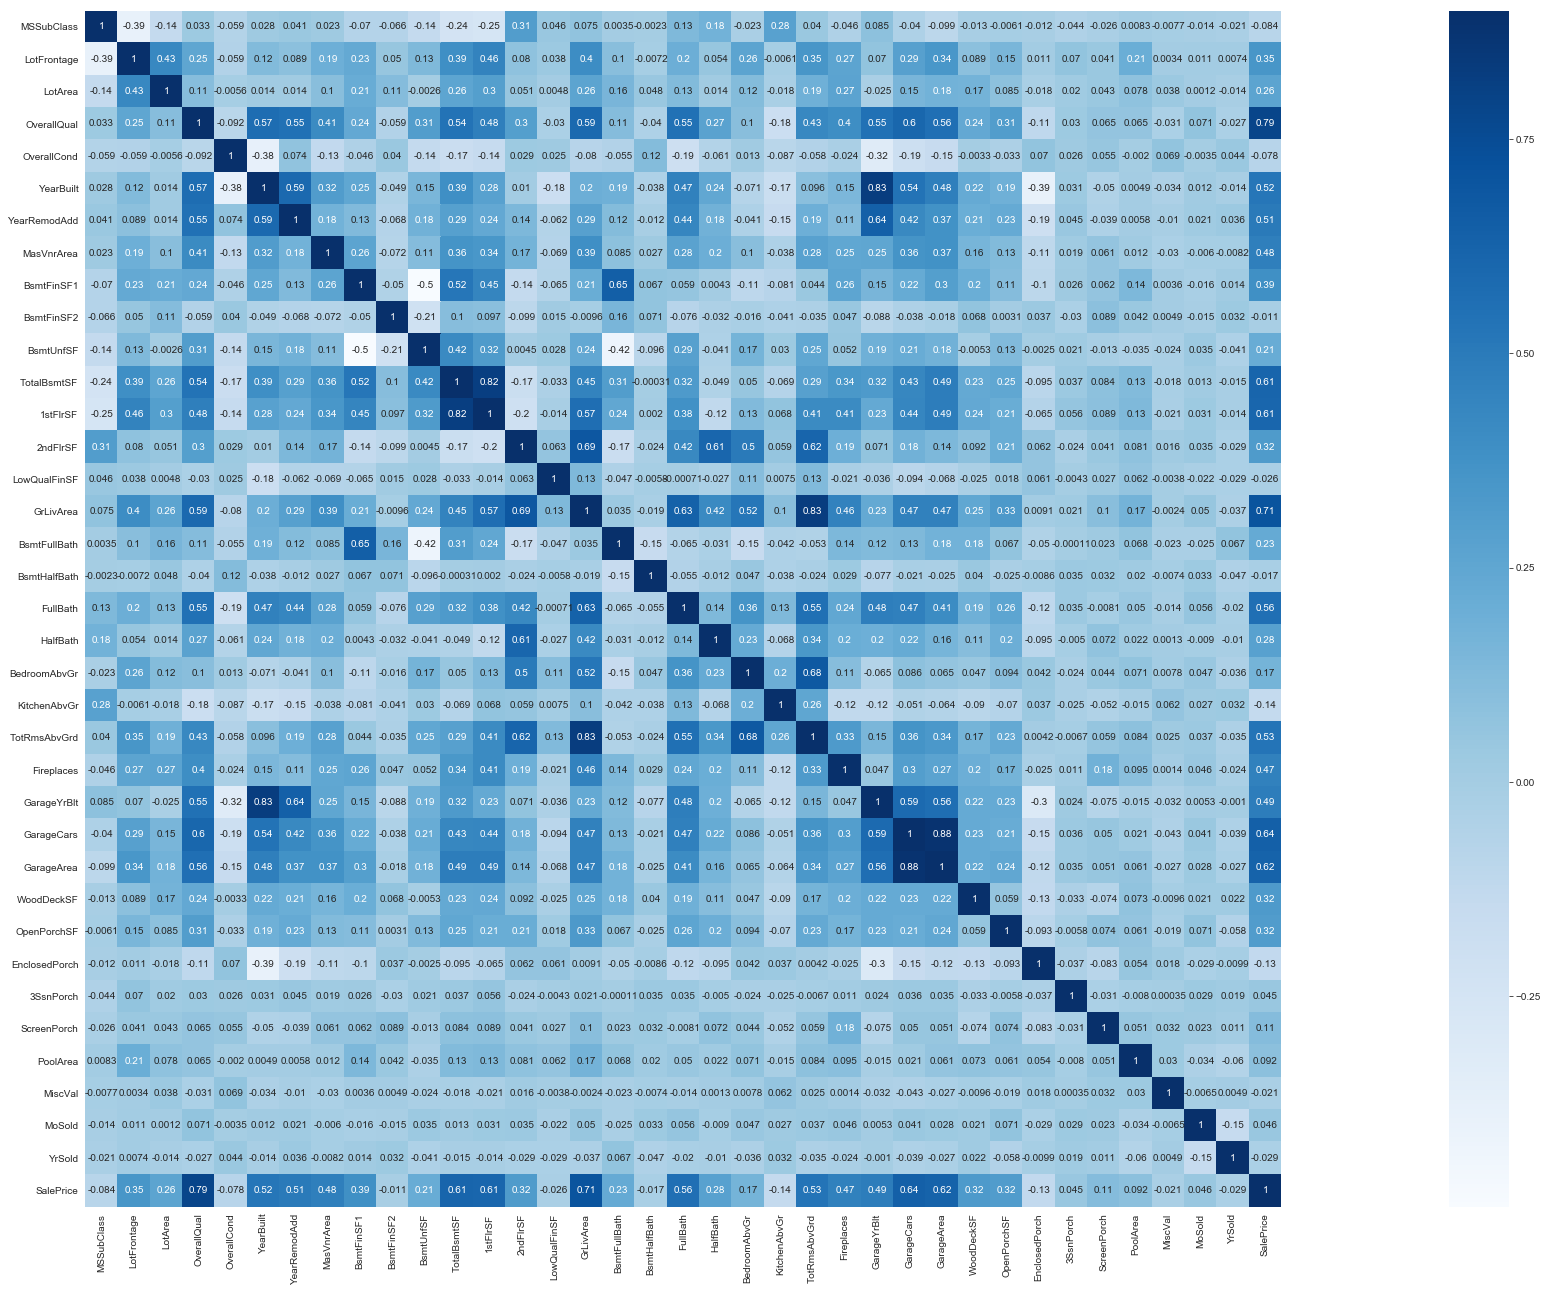

In [688]:
corr = train.corr()
plt.subplots(figsize=(60,22))
sns.heatmap(corr, vmax=0.9, annot = True, cmap="Blues", square=True)

(-0.5, 9.5, 0, 800000)

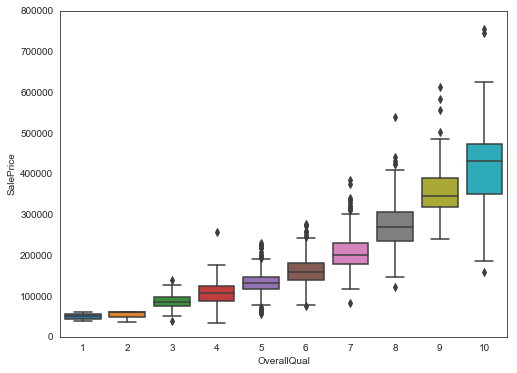

In [689]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=train['OverallQual'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

#### Remove 'OverallQual' outliers

In [690]:
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)

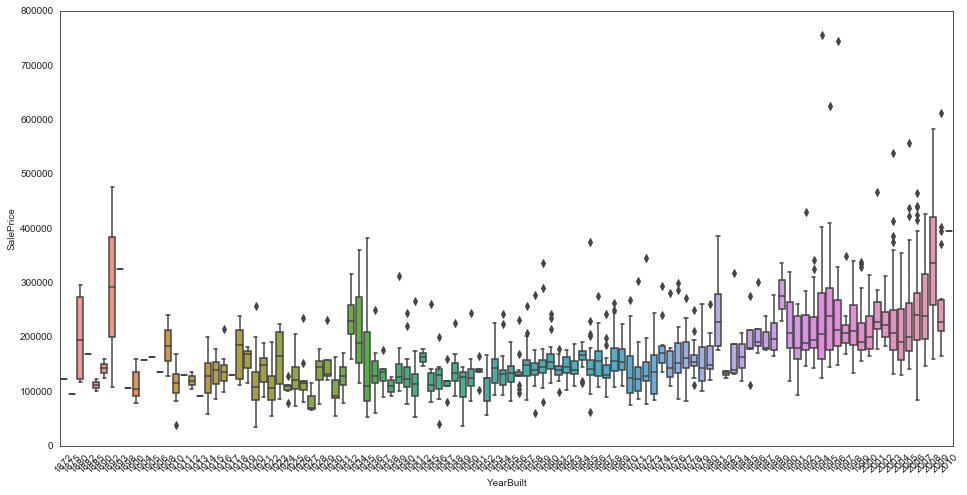

In [497]:
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=train['YearBuilt'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

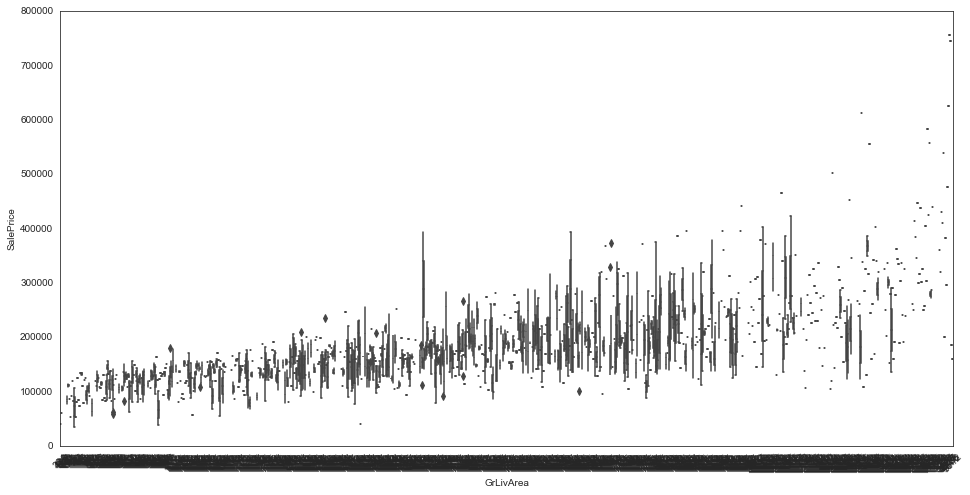

In [498]:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=train['GrLivArea'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

#### Remove 'GrLivArea' outliers

In [691]:
train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)

### SalePrice distribution

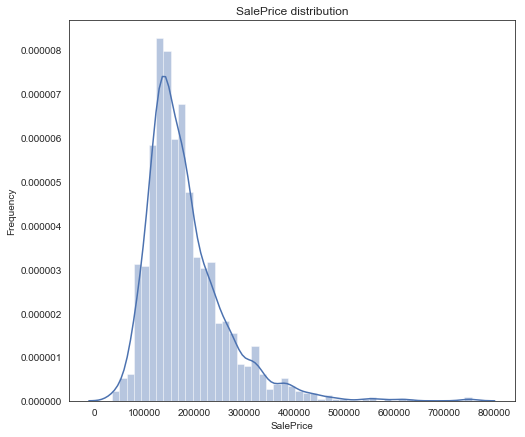

In [692]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train.SalePrice, color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
plt.show()

The SalePrice is skewed to the right. This is a problem because most ML models don't do well with non-normally distributed data. We can apply a log(1+x) tranform to fix the skew.

In [693]:
# Applying log(1+x)

train["SalePrice"] = np.log1p(train["SalePrice"])


 mu = 12.02 and sigma = 0.40



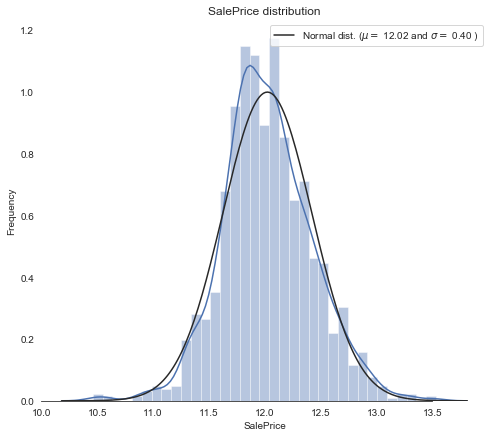

In [694]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

### Missing values

In [695]:
missing_cols = []
k = 0
for col in train.columns:
    if train[col].isnull().sum() > 0:
        k += 1
        missing_cols.append(col)
        
print("We have {} features with missing values: \n{}".format(k,missing_cols))

We have 19 features with missing values: 
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


We want to see how many missing values these columns have.

In [696]:
dict_missing_cols = {}
for col in missing_cols:
    dict_missing_cols[col] = train[col].isnull().sum()
    
dict_missing_cols

{'LotFrontage': 258,
 'Alley': 1366,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1451,
 'Fence': 1176,
 'MiscFeature': 1403}

We'll take a brief look to these features in order to see if it's worth dropping them.

- LotFrontage : Linear feet of street connected to property. This can't be 0, so either we'll impute the mean, or maybe see if there's a correlation with LotArea
- Alley: Type of alley access to property( Grvl	Gravel, Pave	Paved, NA 	No alley access). Maybe these properties don't have an alley access
- MasVnrType/MasVnrArea: they have the same percent of missing values (maybe the same missing values), so we can solve this by imputing the median or setting them as None/0.
- Bsmt... variables: Variables connected to the basement. We see that only 'BsmtFinTypeSF1' and 'BsmtFinTypeSF2' don't have missing values, so we'll see if we find a relationship between these.
- Electrical: 1 missing value - impute the most frequent one
- FireplaceQu: I assume the properties with missing values just don't have a fireplace. There's also the variable Fireplaces (without missing values) that we'll investigate and then decide.
- Garage... variables: We see that we have exactly 81 missing values for each Garage variable.  However, there are some Garage-related variables without missing values: GarageCars, GarageArea.
- PoolQC: probably no pool - but check against PoolArea (which has no missing values).
- Fence: Many missing values - probably no fence, just impute 'None'
- MiscFeature: Assuming none - probably no special features, just impute 'None'

### 1) LotFrontage vs. LotArea

A number of values are missing and one possibility would be to just impute the mean. However, there should actually be a correlation with LotArea, which has no missing values.

In [697]:
train['LotFrontage'].corr(train['LotArea'])

0.38858039632420033

Ok, that's not great. We could assume that most lots are rectangular, using the square root might be an improvement.

In [698]:
train['SqrtLotArea'] = np.sqrt(train['LotArea'])
test['SqrtLotArea'] = np.sqrt(train['LotArea'])
train['LotFrontage'].corr(train['SqrtLotArea'])

0.5809373243873867

This is an improvement.

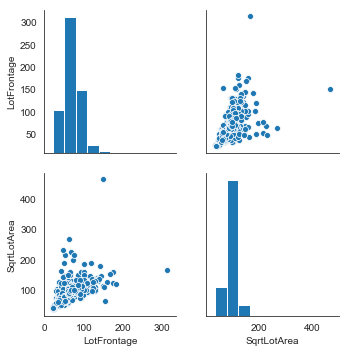

In [699]:
sns.pairplot(train[['LotFrontage','SqrtLotArea']].dropna())

In [700]:
miss_cols_lotfr = train['LotFrontage'].isnull()
train.LotFrontage[miss_cols_lotfr] = train.SqrtLotArea[miss_cols_lotfr]
test.LotFrontage[test['LotFrontage'].isnull()] = test.SqrtLotArea[test['LotFrontage'].isnull()]

C:\Users\Raluca\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Raluca\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##### Deleting the 'SqrtLotArea' feature

In [701]:
train = train.drop('SqrtLotArea',axis=1)
test = test.drop('SqrtLotArea',axis=1)

In [702]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


### 2) Alley

In [703]:
def cat_imputation(column, value):
    train.loc[train[column].isnull(),column] = value
    
def cat_timputation(column,value):
    test.loc[test[column].isnull(),column] = value

In [704]:
train.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [705]:
test.Alley.value_counts()

Grvl    70
Pave    37
Name: Alley, dtype: int64

In [706]:
cat_imputation('Alley','NA')
cat_timputation('Alley','NA')

In [707]:
train.Alley.isnull().sum()
test.Alley.isnull().sum()

0

### 3) MasVnrType & MasVnrArea

In [708]:
train.MasVnrType.value_counts()

None       863
BrkFace    445
Stone      126
BrkCmn      15
Name: MasVnrType, dtype: int64

In [709]:
test.MasVnrType.value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [710]:
cat_imputation('MasVnrType','None')
cat_timputation('MasVnrType','None')

In [711]:
cat_imputation('MasVnrArea',0.0)
cat_timputation('MasVnrArea',0.0)


### 4) Basements variables

In [712]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
train[basement_cols][train['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0


In [713]:
test[basement_cols][test['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
125,NaN,NaN,NaN,NaN,NaN,0.0,0.0
133,NaN,NaN,NaN,NaN,NaN,0.0,0.0
269,NaN,NaN,NaN,NaN,NaN,0.0,0.0
318,NaN,NaN,NaN,NaN,NaN,0.0,0.0
354,NaN,NaN,NaN,NaN,NaN,0.0,0.0
387,NaN,NaN,NaN,NaN,NaN,0.0,0.0
388,NaN,NaN,NaN,NaN,NaN,0.0,0.0
396,NaN,NaN,NaN,NaN,NaN,0.0,0.0
397,NaN,NaN,NaN,NaN,NaN,0.0,0.0
398,NaN,NaN,NaN,NaN,NaN,0.0,0.0


So in the cases where the categorical variables are NaN, the numerical ones are 0. Which means there's no basement, so the categorical ones should also be set to "None".

In [714]:
for cols in basement_cols:
    if 'FinSF' not in cols:
        cat_imputation(cols,'NA')
        
for cols in basement_cols:
    if 'FinSF' not in cols:
        cat_timputation(cols,'NA')

In [715]:
for cols in basement_cols:
    if 'FinSF' not in cols:
        print('Feature {} has {} missing values.'.format(cols,train[cols].isnull().sum()))

Feature BsmtQual has 0 missing values.
Feature BsmtCond has 0 missing values.
Feature BsmtExposure has 0 missing values.
Feature BsmtFinType1 has 0 missing values.
Feature BsmtFinType2 has 0 missing values.


### 5) Electrical

We have only 1 missing value, so we'll impute it with the 'Electrical' mode.

In [716]:
train.Electrical.value_counts()

SBrkr    1331
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [717]:
cat_imputation('Electrical',train.Electrical.mode()[0])
cat_timputation('Electrical',train.Electrical.mode()[0])

In [718]:
train.Electrical.isnull().sum()

0

### 6) FireplaceQu

We'll investigate it along with 'Fireplaces' (number of fireplaces) and decide how to handle this feature.

In [719]:
train['Fireplaces'][train['FireplaceQu'].isnull()==True].describe()

count    690.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Fireplaces, dtype: float64

In [720]:
test['Fireplaces'][test['FireplaceQu'].isnull()==True].describe()

count    730.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Fireplaces, dtype: float64

From 'Fireplaces' feature, we conclude that we'll fill the missing values with 'NA'.

In [721]:
cat_imputation('FireplaceQu','NA')
cat_timputation('FireplaceQu','NA')

In [722]:
train.FireplaceQu.isnull().sum()

0

### 7) Garage variables

'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81 
 are there variables that are missing. Only 'GarageCars' and 'GarageArea' don't have missing values.

In [723]:
garage_cols=['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','GarageCars','GarageArea']
train[garage_cols][train['GarageType'].isnull()==True]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
99,NaN,NaN,NaN,NaN,NaN,0,0
108,NaN,NaN,NaN,NaN,NaN,0,0
125,NaN,NaN,NaN,NaN,NaN,0,0
127,NaN,NaN,NaN,NaN,NaN,0,0
140,NaN,NaN,NaN,NaN,NaN,0,0


We conclude that we don't have Garage for these cars, so we'll fill the missing values with 'NA'.

In [724]:
for cols in garage_cols:
    if train[cols].dtype==np.object:
        cat_imputation(cols,'None')
    else:
        cat_imputation(cols, 0)
    
for cols in garage_cols:
    if test[cols].dtype==np.object:
        cat_timputation(cols,'None')
    else:
        cat_timputation(cols, 0)

In [725]:
for cols in garage_cols:
    print("There are {} missing values for column {}".format(train[cols].isnull().sum(),cols))

There are 0 missing values for column GarageType
There are 0 missing values for column GarageYrBlt
There are 0 missing values for column GarageFinish
There are 0 missing values for column GarageQual
There are 0 missing values for column GarageCond
There are 0 missing values for column GarageCars
There are 0 missing values for column GarageArea


### 8) PoolQC

We'll compare this feature with "PoolArea"

In [726]:
train['PoolArea'][train['PoolQC'].isnull()].describe()

count    1451.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: PoolArea, dtype: float64

In [727]:
test['PoolArea'][test['PoolQC'].isnull()].describe()

count    1456.000000
mean        0.942995
std        21.070757
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       561.000000
Name: PoolArea, dtype: float64

So, we conclude that we don't have pool for those specific houses, so we'll impute the missing values with 'NA'.

In [728]:
cat_imputation('PoolQC','NA')
cat_timputation('PoolQC','NA')

In [729]:
train.PoolQC.isnull().sum()

0

### 9) Fence

In [730]:
cat_imputation('Fence', 'NA')
cat_timputation('Fence', 'NA')

In [731]:
train.Fence.isnull().sum()

0

### 10) MiscFeature

In [732]:
train['MiscVal'][train['MiscFeature'].isnull()].describe()

count    1403.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: MiscVal, dtype: float64

In [733]:
cat_imputation('MiscFeature','NA')
cat_timputation('MiscFeature','NA')

In [734]:
train.MiscFeature.isnull().sum()

0

#### Ensuring if we still have missing values

In [735]:
train[missing_cols].isnull().sum()

LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [736]:
missing_cols = []
k = 0
for col in test.columns:
    if test[col].isnull().sum() > 0:
        k += 1
        missing_cols.append(col)
        
print("We have {} features with missing values: \n{}".format(k,missing_cols))

We have 13 features with missing values: 
['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'SaleType']


In [737]:
dict_missing_cols = {}
for col in missing_cols:
    dict_missing_cols[col] = test[col].isnull().sum()
    
dict_missing_cols

{'MSZoning': 4,
 'Utilities': 2,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'BsmtFinSF1': 1,
 'BsmtFinSF2': 1,
 'BsmtUnfSF': 1,
 'TotalBsmtSF': 1,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'KitchenQual': 1,
 'Functional': 2,
 'SaleType': 1}

In [738]:
for col in missing_cols:
    cat_timputation(col,test[col].mode()[0])

In [739]:
train.corr()['SalePrice'].abs().sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.823506
GrLivArea        0.725299
GarageCars       0.681094
GarageArea       0.656207
TotalBsmtSF      0.647391
1stFlrSF         0.620138
FullBath         0.597106
YearBuilt        0.587761
YearRemodAdd     0.565927
TotRmsAbvGrd     0.538166
Fireplaces       0.491388
MasVnrArea       0.431209
BsmtFinSF1       0.391614
GarageYrBlt      0.349016
WoodDeckSF       0.333742
OpenPorchSF      0.324535
2ndFlrSF         0.320735
HalfBath         0.314933
LotFrontage      0.314646
LotArea          0.259129
BsmtFullBath     0.236473
BsmtUnfSF        0.222552
BedroomAbvGr     0.209982
EnclosedPorch    0.148830
KitchenAbvGr     0.147439
ScreenPorch      0.121496
PoolArea         0.074414
MSSubClass       0.073375
MoSold           0.058025
3SsnPorch        0.055022
LowQualFinSF     0.037878
YrSold           0.037268
OverallCond      0.037119
MiscVal          0.019955
BsmtFinSF2       0.005078
BsmtHalfBath     0.004948
Name: SalePrice, dtype: float64

In [740]:
cat_columns = []
for col in train.columns:
    if train[col].dtype == np.object:
        cat_columns.append(col)
        
cat_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [741]:
cat_tcolumns = []
for col in test.columns:
    if test[col].dtype == np.object:
        cat_tcolumns.append(col)
        
cat_tcolumns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [742]:
for cols in cat_columns:
    train[cols] = train[cols].astype('category')
    train[cols] = train[cols].cat.codes

    
for cols in cat_tcolumns:
    test[cols] = test[cols].astype('category')
    test[cols] = test[cols].cat.codes
test.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.000000,11622,1,1,3,3,0,4,...,120,0,2,2,1,0,6,2010,8,4
1,20,3,81.000000,14267,1,1,0,3,0,0,...,0,0,2,4,0,12500,6,2010,8,4
2,60,3,74.000000,13830,1,1,0,3,0,4,...,0,0,2,2,1,0,3,2010,8,4
3,60,3,78.000000,9978,1,1,0,3,0,4,...,0,0,2,4,1,0,6,2010,8,4
4,120,3,43.000000,5005,1,1,0,1,0,4,...,144,0,2,4,1,0,1,2010,8,4
5,60,3,75.000000,10000,1,1,0,3,0,0,...,0,0,2,4,1,0,4,2010,8,4
6,20,3,100.419122,7980,1,1,0,3,0,4,...,0,0,2,0,3,500,3,2010,8,4
7,60,3,63.000000,8402,1,1,0,3,0,4,...,0,0,2,4,1,0,5,2010,8,4
8,20,3,85.000000,10176,1,1,3,3,0,4,...,0,0,2,4,1,0,2,2010,8,4
9,20,3,70.000000,8400,1,1,3,3,0,0,...,0,0,2,2,1,0,4,2010,8,4


In [743]:
train.corr().abs()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.823506
GrLivArea       0.725299
GarageCars      0.681094
GarageArea      0.656207
TotalBsmtSF     0.647391
1stFlrSF        0.620138
FullBath        0.597106
ExterQual       0.588025
YearBuilt       0.587761
BsmtQual        0.578437
YearRemodAdd    0.565927
TotRmsAbvGrd    0.538166
KitchenQual     0.536977
GarageType      0.503092
Fireplaces      0.491388
MasVnrArea      0.431209
HeatingQC       0.425683
GarageFinish    0.417320
Foundation      0.412812
BsmtFinSF1      0.391614
CentralAir      0.351551
GarageYrBlt     0.349016
WoodDeckSF      0.333742
OpenPorchSF     0.324535
GarageCond      0.323607
2ndFlrSF        0.320735
HalfBath        0.314933
LotFrontage     0.314646
PavedDrive      0.304598
                  ...   
BsmtFinType1    0.124697
Exterior1st     0.122559
BsmtCond        0.122243
ScreenPorch     0.121496
Condition1      0.115747
Alley           0.112861
RoofMatl        0.104297
PoolQC          0.087210
PoolArea        0.074414


## Building the model <a id="step5"></a>

In [744]:
X = train.drop('SalePrice',axis=1)
y = train.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)

In [745]:
def RMSE(actual,pred):
    return np.sqrt(mean_squared_error(actual, pred))

### 1) Linear Regression

In [746]:
model = LinearRegression()
model.fit(X_train,y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print("Error: {}".format(RMSE(y_train,pred_train)))
print("Error: {}".format(RMSE(y_test,pred_test)))

Error: 0.10688249052580337
Error: 0.12931398391920196


### 2) Light Gradient Boosting Regressor

In [747]:
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

lightgbm.fit(X_train,y_train)

pred_train = lightgbm.predict(X_train)
pred_test = lightgbm.predict(X_test)
print("Error: {}".format(RMSE(y_train,pred_train)))
print("Error: {}".format(RMSE(y_test,pred_test)))

Error: 0.03927358615690732
Error: 0.1219311386685467


### 3) XGBoost Regressor

In [748]:
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

xgboost.fit(X_train,y_train)

pred_train = xgboost.predict(X_train)
pred_test = xgboost.predict(X_test)
print("Error: {}".format(RMSE(y_train,pred_train)))
print("Error: {}".format(RMSE(y_test,pred_test)))

C:\Users\Raluca\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:50:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Error: 0.12176288480757769
Error: 0.1454706240006048


### 4) Gradient Boosting Regressor

In [749]:
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

gbr.fit(X_train,y_train)

pred_train = gbr.predict(X_train)
pred_test = gbr.predict(X_test)
print("Error: {}".format(RMSE(y_train,pred_train)))
print("Error: {}".format(RMSE(y_test,pred_test)))

Error: 0.05195889622723158
Error: 0.11982391383404128


### 5) Random Forest Regressor

In [750]:
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)
rf.fit(X_train,y_train)

pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)
print("Error: {}".format(RMSE(y_train,pred_train)))
print("Error: {}".format(RMSE(y_test,pred_test)))

Error: 0.09028729636386386
Error: 0.1402844410828008


In [753]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.000000,11622,1,1,3,3,0,4,...,120,0,2,2,1,0,6,2010,8,4
1,20,3,81.000000,14267,1,1,0,3,0,0,...,0,0,2,4,0,12500,6,2010,8,4
2,60,3,74.000000,13830,1,1,0,3,0,4,...,0,0,2,2,1,0,3,2010,8,4
3,60,3,78.000000,9978,1,1,0,3,0,4,...,0,0,2,4,1,0,6,2010,8,4
4,120,3,43.000000,5005,1,1,0,1,0,4,...,144,0,2,4,1,0,1,2010,8,4
5,60,3,75.000000,10000,1,1,0,3,0,0,...,0,0,2,4,1,0,4,2010,8,4
6,20,3,100.419122,7980,1,1,0,3,0,4,...,0,0,2,0,3,500,3,2010,8,4
7,60,3,63.000000,8402,1,1,0,3,0,4,...,0,0,2,4,1,0,5,2010,8,4
8,20,3,85.000000,10176,1,1,3,3,0,4,...,0,0,2,4,1,0,2,2010,8,4
9,20,3,70.000000,8400,1,1,3,3,0,0,...,0,0,2,2,1,0,4,2010,8,4


## Submission file

In [759]:
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

lightgbm.fit(X_train,y_train)

pred_test = lightgbm.predict(test)

In [761]:
pred_test = np.exp(pred_test)
pred_test

array([122184.50766866, 159315.97424186, 182980.46756011, ...,
       158857.56070093, 115171.98796335, 201109.70327825])

In [762]:
output=pd.DataFrame({'Id':test_ID, 'SalePrice':pred_test})
output.to_csv('submission.csv', index=False)